# Analiza danych wielowymiarowych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from scipy.stats import multivariate_normal

### Rozkład wielomianowy

Zmienna losowa $(X_1, X_2, \ldots, X_k)$ ma rozkład wielomianowy, jeżeli 
\begin{equation*}
    P(X_1=n_1, \ldots, X_k=n_k)=\frac{n!}{n_1!\cdot\ldots\cdot n_k!}p_1^{n_1}\cdot\ldots\cdot p_k^{n_k},
\end{equation*}
gdzie $p_i\in(0,1)$, $i=1,2,\ldots, k$, $p_1+p_2+\ldots+p_k=1$, $n_1+n_2+\ldots+n_k=n$.

Rozkład wielomianowy jest uogólnieniem rozkładu dwumianowego i opisuje rozkład wyników przy $n$-krotnym powtórzeniu doświadczenia o $k$ możliwych rezultatach. 

$X_i$ oznacza liczbę wyników $i$-tego typu w serii.

Rozkład wielomianowy można wykorzystać do obliczenia prawdopodobieństwa w sytuacjach, w których istnieją więcej niż dwa możliwe wyniki.

## Zadanie 1 - Rozkład wielomianowy

1. Zdefiniuj zmienną losową dla rozkładu wielomianowego (`stats.multinomial`).
2. Wygeneruj $n$ punktów z zaproponowanego rozkładu wielomianowego, narysuj histogramy.
2. Oblicz: w pewnym mieście 40% uprawnionych do głosowania popiera kandydata A, 10% popiera kandydata B, a pozostałe 50% nie ma preferencji. Wybieramy losowo 10 uprawnionych do głosowania. Jakie jest prawdopodobieństwo, że 4 z nich popiera kandydata A, 1 popiera kandydata B, a pozostałe 5 nie będzie miało preferencji?

In [14]:
rv = stats.multinomial(10, [0.4, 0.1, 0.5])
print(rv)

Po tej operacji zmienna **rvs** staje się obiektem reprezentującym rozkład wielomianowy, którego możemy używać do:
<br><br>
* Symulacji wartości (rvs – random variates).
* Obliczania prawdopodobieństw (pmf – probability mass function).
* Analizy statystycznej tego rozkładu.

In [15]:
rv.pmf([4,1,5])  # bo chcemy sprawdzić, jakie jest prawdopodobieństwo, że 4 osoby wybiorą pierwszą opcję, 1 drugą, a 5 trzecią
# Żadna inna konfiguracja nie da większego prawdopodobieństwa niż ta, ponieważ wartości [0.4, 0.1, 0.5] sugerują,
# że taka konfiguracja najlepiej odzwierciedla rozkład prawdopodobieństwa dla 10 prób.

np.float64(0.10080000000000021)

In [16]:
rv.pmf([3,5,2]) 

np.float64(0.00040320000000000243)

Prawdopodobieństwo, że 4 osoby popierają A, 1 osobę B, a 5 osób nie ma preferencji wynosi: 0.10080


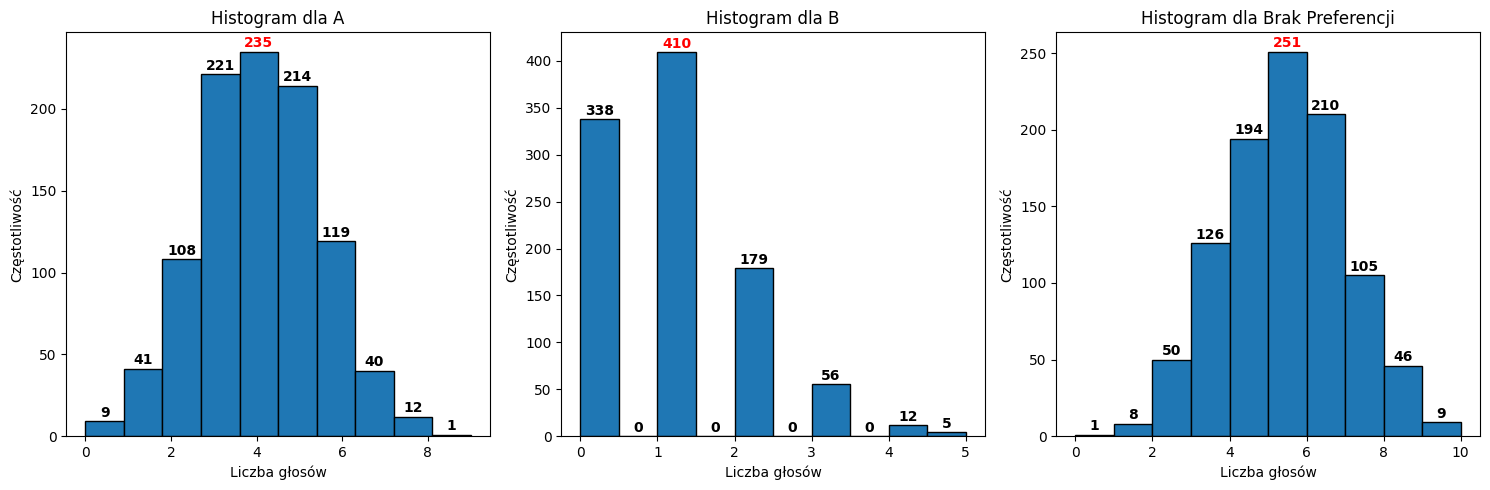

In [ ]:
# 1. Definicja zmiennej losowej dla rozkładu wielomianowego
# Parametry rozkładu:
n = 10  # liczba prób (liczba losowanych osób)
p = [0.4, 0.1, 0.5]  # prawdopodobieństwa dla A, B i braku preferencji

# Tworzymy obiekt rozkładu wielomianowego
rv = stats.multinomial(n, p)

# 1. Obliczanie prawdopodobieństwa dla konkretnego wyniku
# Konkretny wynik: 4 dla A, 1 dla B, 5 dla braku preferencji
x = [4, 1, 5]
# Obliczamy prawdopodobieństwo tego wyniku
probability = rv.pmf(x)
print(f'Prawdopodobieństwo, że 4 osoby popierają A, 1 osobę B, a 5 osób nie ma preferencji wynosi: {probability:.5f}')

# 2. Generowanie danych i tworzenie histogramów
# Generujemy 1000 próbek z rozkładu wielomianowego
# Generując 1000 próbek, symulujemy 1000 powtórzeń tego eksperymentu, aby zobaczyć, jak rozkładają się wyniki w dłuższej perspektywie
data = rv.rvs(size=1000)

# Tworzenie histogramów z wyróżnioną największą wartością
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
labels = ['A', 'B', 'Brak Preferencji']

for i in range(3):
    counts, bins, patches = axs[i].hist(data[:, i], bins=10, edgecolor='black')
    axs[i].set_title(f'Histogram dla {labels[i]}')
    axs[i].set_xlabel('Liczba głosów')
    axs[i].set_ylabel('Częstotliwość')
    
    # Znalezienie maksymalnej wartości
    max_count = max(counts)
    
    # Dodawanie cyfr na słupkach i kolorowanie największej na czerwono
    for count, patch in zip(counts, patches):
        color = 'red' if count == max_count else 'black'
        axs[i].text(patch.get_x() + patch.get_width() / 2,  # Środek słupka
                    count + 1,  # Nad słupkiem
                    int(count),  # Wartość liczby
                    ha='center', va='bottom', fontsize=10, color=color, fontweight='bold')

plt.tight_layout()
plt.show()


✅ Histogram dla A
- W przeprowadzonych 1000 symulacjach, każda z nich składała się z 10 prób, gdzie każda próba to wybór między trzema kategoriami: A, B i brak preferencji.
- Na histogramie widzimy, ile razy kandydat A otrzymał daną liczbę głosów (od 0 do 10) w tych 1000 eksperymentach.
- Najwyższy słupek (największa wartość na histogramie) oznacza, że najczęściej kandydat A otrzymywał dokładnie 4 głosy na 10 prób.
- Wartość liczby na słupku (np. 245) mówi nam, że w 245 z 1000 eksperymentów kandydat A uzyskał dokładnie 4 głosy.

In [6]:
rv.pmf([4,1,5]) #prawdopodobieństwo, rozkładu takiego jak wcześniej zdefiniowany 
# w punkcie (4,1,5), duże, patrząc na ilość możliwych argumentów, gdzie prawdopodobieństwo
# jest niezerowe

np.float64(0.10080000000000021)

# Rozkład dwuwymiarowy normalny
Zmienna losowa $(X, Y)$ ma rozkład dwuwymiarowy normalny z parametrami $\mu_X$, $\mu_Y$, $\sigma_X>0$, $\sigma_Y>0$ oraz $\rho\in(-1,1)$, jeżeli jej gęstość $f$ wyraża się wzorem
\begin{equation*}
    f(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y\sqrt{1-\rho^2}} \exp\Bigg\{-\frac{1}{2(1-\rho^2)}\Bigg[\frac{(x-\mu_X)^2}{\sigma^2_X} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} \Bigg] \Bigg\}.
\end{equation*}

Jeżeli dwuwymiarowa zmienna losowa $(X, Y)$ ma rozkład normalny, to zmienne losowe $X$ i $Y$ mają, odpowiednio, jednowymiarowe rozkłady normalne $\mathcal{N}(\mu_X, \sigma_X)$~i~$\mathcal{N}(\mu_Y, \sigma_Y)$.}

## Zadanie 2 - Dwuwymiarowy rozkład normalny
1. Zdefiniuj zmienną losową dla rozkładu normalnego 2-wymiarowego (`multivariate_normal`, `np.meshgrid`).
2. Narysuj gęstość (`multivariate_normal.pdf`) oraz wykres konturowy gęstości (`plot_surface` i `contourf`).
3. Wylosuj $n$ obserwacji ze zdefiniowanego rozkładu i narysuj wykres rozproszenia dla wylosowanej próbki.
4. Porównaj wykresy gęstości dla różnych wartości wektora średniej i macierzy kowariancji.

$ρ (rho)$ to symbol używany do oznaczenia współczynnika korelacji Pearsona (𝜌), który mierzy siłę i kierunek liniowej zależności między dwiema zmiennymi losowymi.

In [28]:
#najpierw dla danych nieskorelowanych co oznacza w przypadku rozkładu normalnego niezależność

# Parametry rozkładu
m = [0, 0]  # Średnie dla każdej zmiennej
s = [[1, 0], [0, 1]]  # Macierz kowariancji, zera oznaczają brak korelacji między zmiennymi (rho = 0)

# Tworzymy rozkład normalny wielowymiarowy
mnormal = multivariate_normal(mean=m, cov=s)

**Rozkład wielowymiarowy normalny** jest uogólnieniem rozkładu normalnego na więcej niż jedną zmienną losową. Oznacza to, że zamiast opisywać pojedynczą zmienną losową (np. wzrost osoby), opisujemy wektor zmiennych losowych, które mogą być ze sobą powiązane (skorelowane) lub niezależne.

Każda ze zmiennych składowych tego rozkładu ma swój własny rozkład normalny (Gaussowski), a relacje między nimi opisuje macierz kowariancji.

In [29]:
XY = mnormal.rvs(size = 1000)

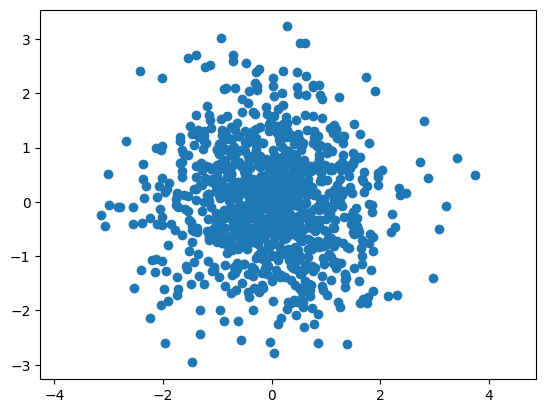

In [30]:
plt.scatter(XY[:,0],XY[:,1])
plt.axis('equal')
plt.show()
#punkty układają się na kształt koła im bliżej środka tym ich więcej

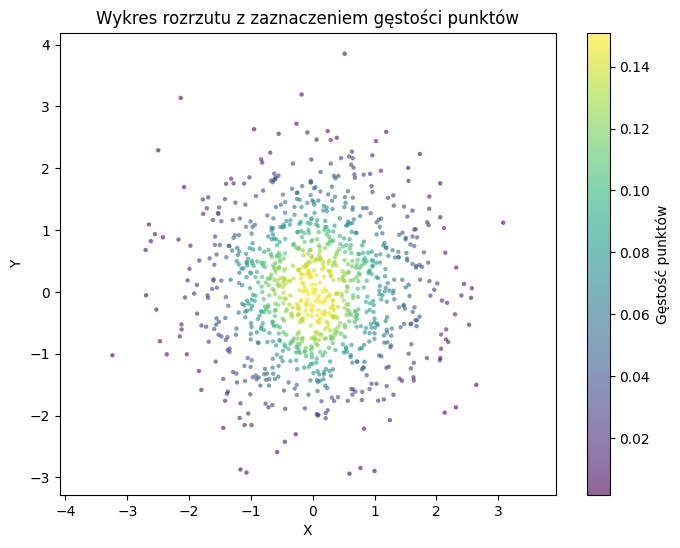

In [34]:
from scipy.stats import gaussian_kde

# Generowanie próbek
np.random.seed(42)
XY = np.random.multivariate_normal(m, s, size=1000)

# Obliczanie gęstości punktów
x = XY[:, 0]
y = XY[:, 1]
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)  # Obliczenie gęstości dla każdego punktu

# Tworzenie wykresu z gęstością jako kolorem
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=density, s=10, cmap='viridis', alpha=0.6, edgecolor='none')

# Dodatkowe ustawienia
plt.axis('equal')
plt.colorbar(label='Gęstość punktów')
plt.title('Wykres rozrzutu z zaznaczeniem gęstości punktów')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [7]:
#techniczne przeróbki, aby narysować gęstość 3D
N = 100
X = np.linspace(-5,5,N)
Y = np.linspace(-5,5,N)
X,Y = np.meshgrid(X,Y)
print(X)
print(Y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
pos

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
[[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]


array([[[-5.       , -5.       ],
        [-4.8989899, -5.       ],
        [-4.7979798, -5.       ],
        ...,
        [ 4.7979798, -5.       ],
        [ 4.8989899, -5.       ],
        [ 5.       , -5.       ]],

       [[-5.       , -4.8989899],
        [-4.8989899, -4.8989899],
        [-4.7979798, -4.8989899],
        ...,
        [ 4.7979798, -4.8989899],
        [ 4.8989899, -4.8989899],
        [ 5.       , -4.8989899]],

       [[-5.       , -4.7979798],
        [-4.8989899, -4.7979798],
        [-4.7979798, -4.7979798],
        ...,
        [ 4.7979798, -4.7979798],
        [ 4.8989899, -4.7979798],
        [ 5.       , -4.7979798]],

       ...,

       [[-5.       ,  4.7979798],
        [-4.8989899,  4.7979798],
        [-4.7979798,  4.7979798],
        ...,
        [ 4.7979798,  4.7979798],
        [ 4.8989899,  4.7979798],
        [ 5.       ,  4.7979798]],

       [[-5.       ,  4.8989899],
        [-4.8989899,  4.8989899],
        [-4.7979798,  4.8989899],
        .

In [8]:
Z = mnormal.pdf(pos) #liczymy gęstość na zdefiniowanej wcześniej siatce

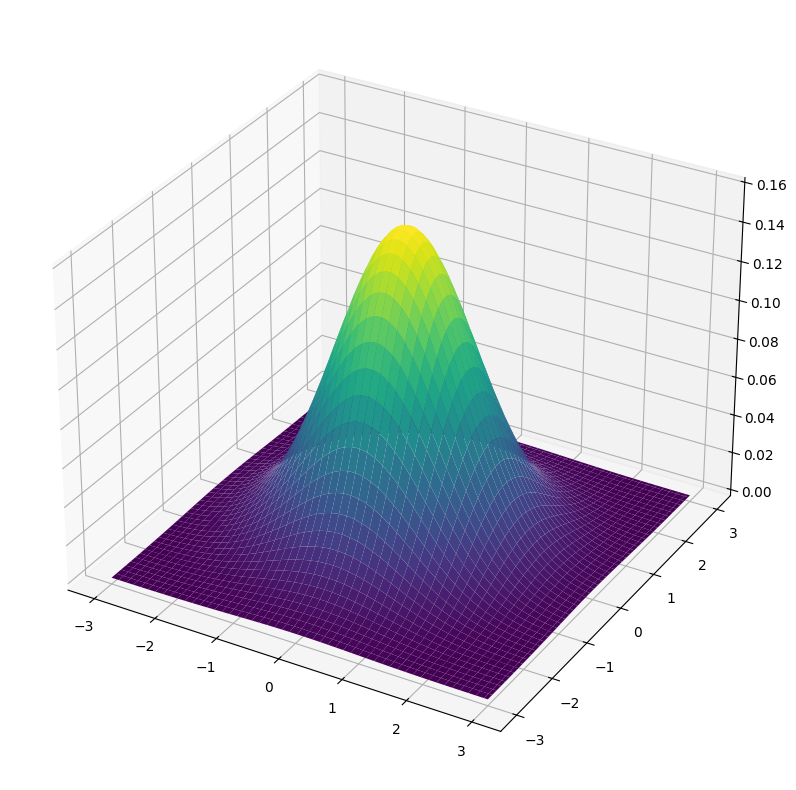

In [38]:
#gęstość - wykres
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)

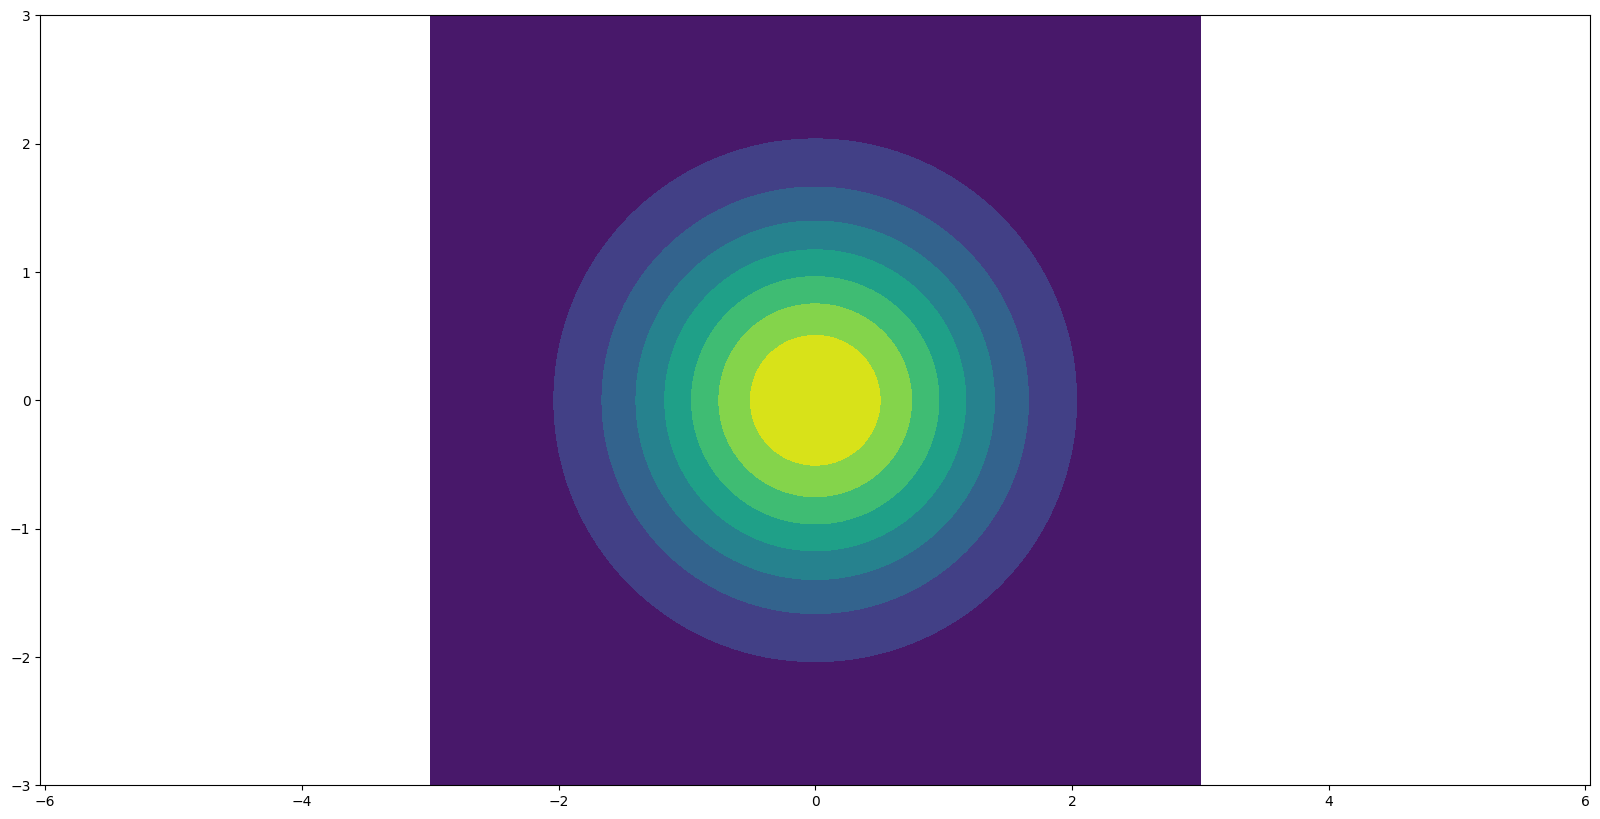

In [43]:
#gęstość - wykres konturowy
fig,ax = plt.subplots(figsize = (20,10))
plt.axis('equal')
ax.contourf(X,Y,Z,cmap = cm.viridis);
#pokrywa się kształtem i częstością występowania punktów z punktami generowanymi z tego rozkładu

In [44]:
#zmiana parametrów średniej przesuwa nam tylko środek rozkładu o wektor którego współrzędne to
#wartości średniej

#o wiele ciekawsza jest skorelowanie zmiennych
# rho = 0.9, czyli bardzo silna korelacja

m = [0,0]
s=[[1,0.9],[0.9,1]]

mnormal = multivariate_normal(mean = m, cov = s)

In [46]:
XY = mnormal.rvs(size = 1000)
XY

array([[ 0.69039774,  0.62576702],
       [ 0.84121769,  0.70349311],
       [ 1.79797335,  1.8933612 ],
       ...,
       [ 2.00643067,  2.01915728],
       [ 2.09682122,  1.95357968],
       [-1.68241021, -1.52112357]], shape=(1000, 2))

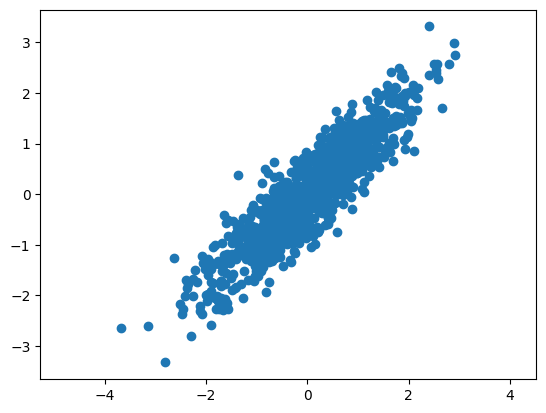

In [47]:
plt.scatter(XY[:,0],XY[:,1])
plt.axis('equal')
plt.show()
#widzimy silną zależność liniową (najwięcej punktów blisko 0)

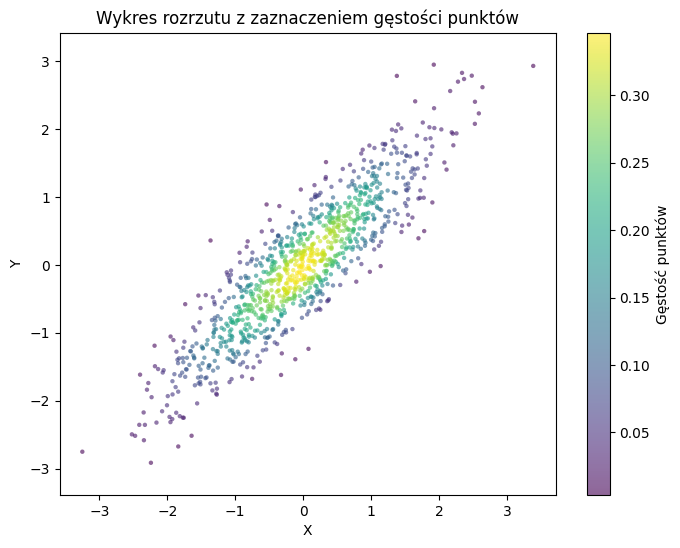

In [50]:
# Generowanie próbek
np.random.seed(42)
XY = np.random.multivariate_normal(m, s, size=1000)

# Obliczanie gęstości punktów
x = XY[:, 0]
y = XY[:, 1]

xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)  # Obliczenie gęstości dla każdego punktu

# Tworzenie wykresu z gęstością jako kolorem
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=density, s=10, cmap='viridis', alpha=0.6, edgecolor='none')

# Dodatkowe ustawienia
plt.axis('equal')
plt.colorbar(label='Gęstość punktów')
plt.title('Wykres rozrzutu z zaznaczeniem gęstości punktów')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [54]:
N = 100
X = np.linspace(-5,5,N)
Y = np.linspace(-5,5,N)
X,Y = np.meshgrid(X,Y)
print(X)
print(Y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
[[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]


In [55]:
Z = mnormal.pdf(pos) # liczymy gęstość na zdefiniowanej wcześniej siatce

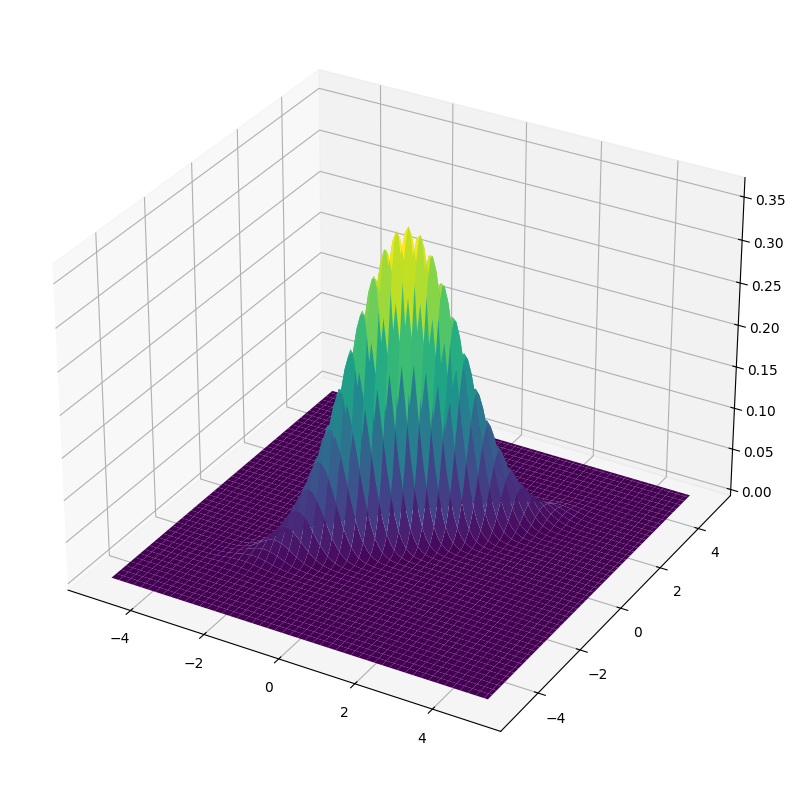

In [56]:
#gęstość - wykres
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)
#silna zależność liniowa

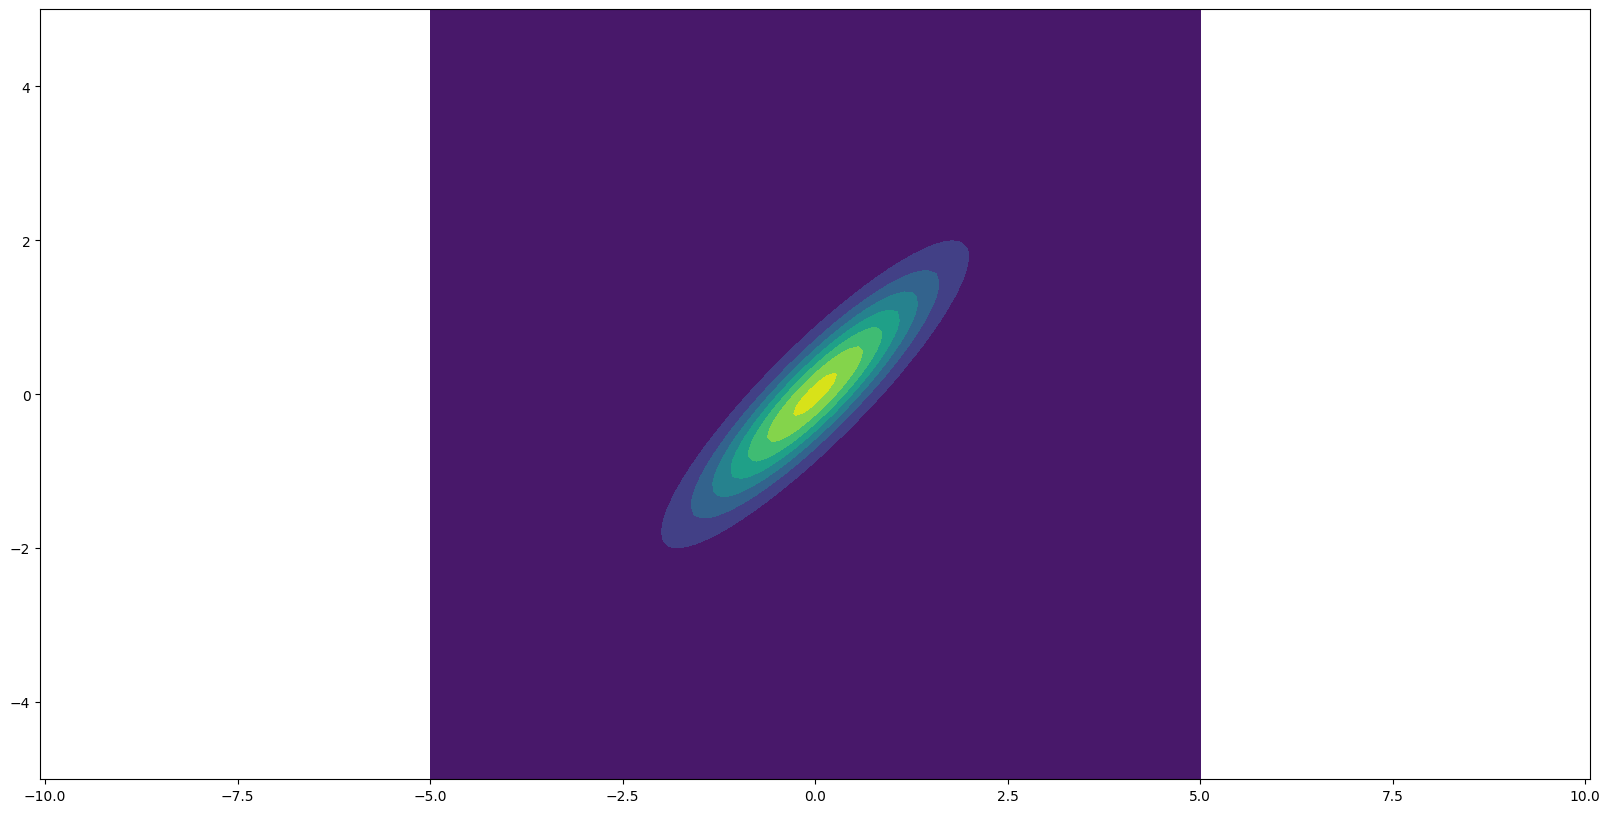

In [17]:
#gęstość - wykres konturowy
fig,ax = plt.subplots(figsize = (20,10))
plt.axis('equal')
ax.contourf(X,Y,Z,cmap = cm.viridis)
#pokrywa się kształtem i częstością występowania punktów z punktami generowanymi z tego rozkładu
#silna zależność liniowa

🚗 Wykres: Zużycie paliwa w zależności od prędkości i obciążenia
📝 Interpretacja wykresu:
Oś X (Prędkość km/h)

- Reprezentuje prędkość pojazdu, od 0 do 200 km/h.
- Wraz ze wzrostem prędkości zużycie paliwa rośnie nieliniowo.
- Oś Y (Obciążenie kg)

- Przedstawia obciążenie samochodu (0–500 kg).
- Wzrost obciążenia powoduje dodatkowe zużycie paliwa.
- Oś Z (Zużycie paliwa L/100 km)

- Pokazuje, ile litrów paliwa samochód zużywa na 100 km.
- Niższe wartości są oznaczone kolorem fioletowym, wyższe – żółtym

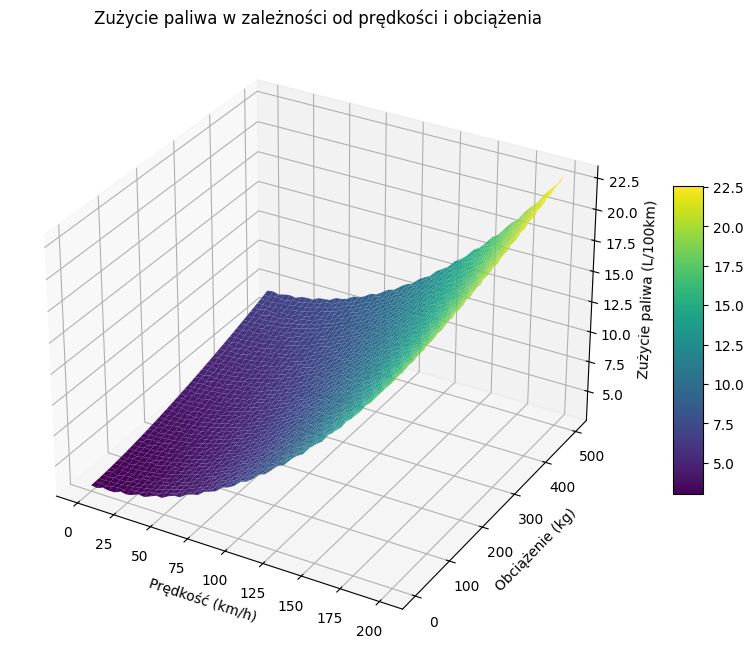

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parametry wykresu
speed = np.linspace(0, 200, 50)  # Prędkość (0-200 km/h)
load = np.linspace(0, 500, 50)  # Obciążenie (0-500 kg)

# Tworzenie siatki wartości
X, Y = np.meshgrid(speed, load)

# Funkcja reprezentująca zużycie paliwa (przykładowa formuła)
Z = 3 + (X / 50)**2 + (Y / 200)**1.5 + 0.1 * np.sin(X) * np.cos(Y)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Powierzchnia 3D
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Opisy osi
ax.set_xlabel('Prędkość (km/h)')
ax.set_ylabel('Obciążenie (kg)')
ax.set_zlabel('Zużycie paliwa (L/100km)')
ax.set_title('Zużycie paliwa w zależności od prędkości i obciążenia')

# Dodanie paska kolorów
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Wyświetlenie wykresu
plt.show()


#Kowariancja
Kowariancją zmiennych losowych $X$ i $Y$ nazywamy liczbę $\text{Cov}(X, Y)$ określoną wzorem
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}X)(Y-\mathbb{E}Y) ].
\end{equation*}

Kowariancja może być traktowana jako pewna miara zgodności dwóch zmiennych losowych, będąc średnią wartością iloczynu odchyleń obu zmiennych od ich wartości oczekiwanych. 

Bezpośrednio z definicji wynika, że 
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}(XY) - (\mathbb{E}X)(\mathbb{E}Y).
\end{equation*}

Gdy zmienna losowa $(X, Y)$ jest typu dyskretnego, to
    \begin{equation*}
        \mathbb{E}(XY) = \sum_i\sum_k x_iy_kP(X=x_i, Y=y_k).
    \end{equation*}
Gdy zmienna losowa $(X, Y)$ jest typu ciągłego, to
    \begin{equation*}
        \mathbb{E}(XY) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} xyf(x,y)dxdy.
    \end{equation*}

Własności:
    

*   Jeżeli $\text{Cov}(X, Y)=0$, to zmienne losowe $X$ i $Y$ nazywamy eskorelowanymi. Wynika stąd, że zmienne losowe niezależne są jednocześnie nieskorelowane, ale zmienne losowe nieskorelowane mogą być zależne.
*   $\text{Var}(X\pm Y) = \text{Var}(X) + \text{Var}(Y) \pm 2\text{Cov}(X, Y)$.
*   $\text{Cov}(aX+b, cY+d) = ac\text{Cov}(X, Y)$.


# Współczynnik korelacji
Współczynnikiem korelacji zmiennych losowych $X$ i $Y$ nazywamy liczbę
\begin{equation*}
    \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)}\sqrt{\text{Var}(Y)}}
\end{equation*}
Własności:

*    $|\rho(X, Y)|\leq 1$.
*    Jeżeli zmienne losowe $X$ i $Y$ są niezależne, to $\rho(X, Y)=0$.
*   Dla dowolnych liczb rzeczywistych $a, b, c, d$ zachodzi
    \begin{equation*}
        |\rho(aX+b, cY+d)|=|\rho(X, Y)|.
    \end{equation*}
*    Zmienne losowe $X$ i $Y$ są zależne liniowo wtedy i tylko wtedy, gdy $|\rho(X, Y)|=1$

# Korelacja Pearsona
Chcemy przybliżać $\rho(X, Y)$ za pomocą próby. Empirycznym odpowiednikiem korelacji jest korelacja Pearsona dana wzorem:
\begin{equation*} 
\hat{\rho}(X_1,...,X_n,Y_1,..,Y_n) = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}}
\end{equation*}

#Macierz Kowariancji

Niech $(X_1, X_2, \ldots, X_n)$ będzie wektorem losowym (o składowych całkowalnych z kwadratem), wtedy \textbf{macierz kowariancji} jest określona następująco:
\begin{equation*}
    \sum = 
\begin{bmatrix}
\sigma^2_1 & \sigma_{12} & \ldots & \sigma_{1n}\\
\sigma_{21} & \sigma^2_2 & \ldots & \sigma_{2n}\\
\vdots & \ldots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \ldots & \sigma^2_n
\end{bmatrix}
\end{equation*}
gdzie:
*    $\sigma_i^2$ jest wariancją zmiennej losowej $X_i$;
*    $\sigma_{ij}=\text{Cov}(X_i, X_j)$ jest kowariancją między zmiennymi losowym $X_i$ oraz $X_j$.

# Wielowymiarowy rozkład normalny
Wektor losowy $(X_1,\ldots, X_n)$ ma rozkład $N$-wymiarowy rozkład normalny z macierzą kowariancji $\sum$ oraz wektorem średnich $\mu$, jeżeli jej gęstość $f$ wyraża się wzorem
\begin{equation*}
    f(x_1, \ldots, x_n) = \frac{1}{\sqrt{(2\pi)^n|\sum|}} \exp\Bigg\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \Bigg\}.
\end{equation*}


## Zadanie 3 - Korelacja zmiennych losowych
Wygeneruj $3$-wymiarowy wektor losowy z rozkładu normalnego, tak aby 1 i 2 współrzędne były ze sobą skorelowane, natomiast 1 i 3 oraz 2 i 3 są zmiennymi parami niezależnymi. 

1. Narysuj zależność pomiędzy parami zmiennych (np. możesz użyć funcji `pairplot`)
2. Oblicz współczynnik korelacji Pearsona dla wygenerowanych par zmiennych i narysuj `heatmap`.
3. Powtórz punkty 1 i 2 dla wektora $5$-wymiarowego z rozkładu normalnego, tak aby 1, 3 i 5 współrzędne były ze sobą skorelowane a pozostałe niezależne.

In [18]:
s=[
   [2,-0.9*np.sqrt(2),0],
   [-0.9*np.sqrt(2),1,0],
   [0,0,3]
]

#Cov(X_1,X_3) = Cov(X_3,X_1) = 0 (bo mają być zależne)
#zatem wyrazy [3,1] i [1,3] macierzy muszą być równe 0

#Cov(X_2,X_3) = Cov(X_3,X_2) = 0 (bo mają być zależne) 
#zatem wyrazy [3,2] i [2,3] macierzy muszą być równe 0

#Cov(X_1,X_2) = Cov(X_2,X_1) różne od 0 (bo mają być zależne)
#zatem wyrazy [1,2] i [2,1] macierzy muszą być różne od 0

#Cov(X_1,X_1) = #Var(X_1)>0 #zatem wyraz [1,1] musi być >0
#Cov(X_2,X_2) = #Var(X_2)>0 #zatem wyraz [2,2] musi być >0
#Cov(X_3,X_3) = #Var(X_3)>0 #zatem wyraz [3,3] musi być >0
mu = [0,0,0]


In [19]:
XYZ = stats.multivariate_normal.rvs(size = 1000, mean = mu, cov = s)

          0         1         2
0  1.000000 -0.904190 -0.075156
1 -0.904190  1.000000  0.041611
2 -0.075156  0.041611  1.000000


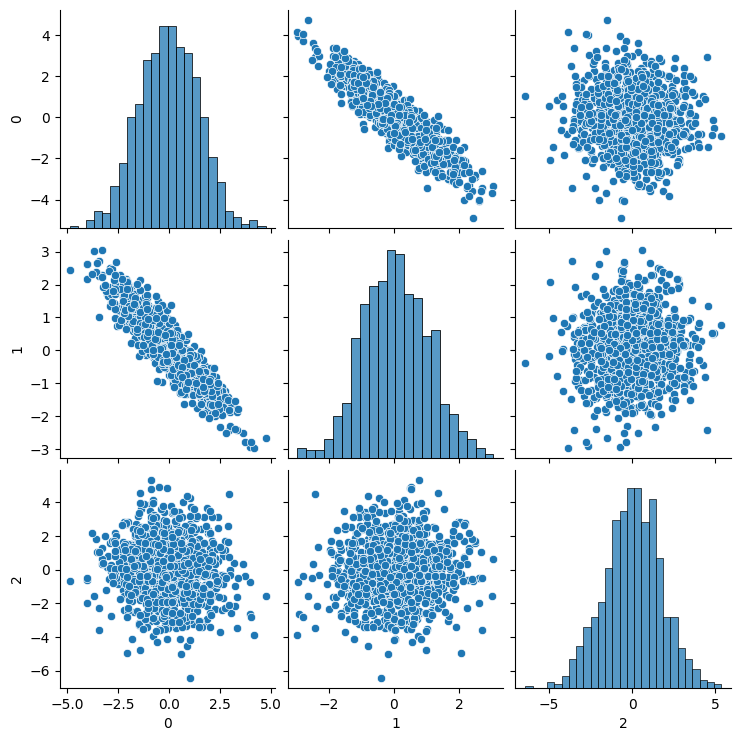

In [20]:
df = pd.DataFrame(XYZ)
cor = df.corr()
print(cor) #korelacje pearsona
#-0.898243 bliskie prawdziwemu -0.9*sqrt(2)/(sqrt(1)*sqrt(2)) = -0.9
#-0.015792 i 0.017455 bliskie prawdziwemu 0
sns.pairplot(df) 
#na diagonalach histogramy gęstości X_1,X_2 i X_3
#na pozostałych miejscach wykres rozproszenia X_i od X_j

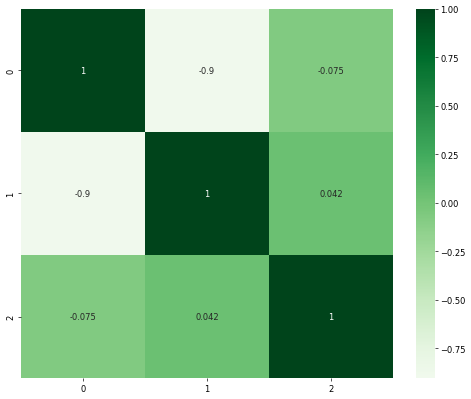

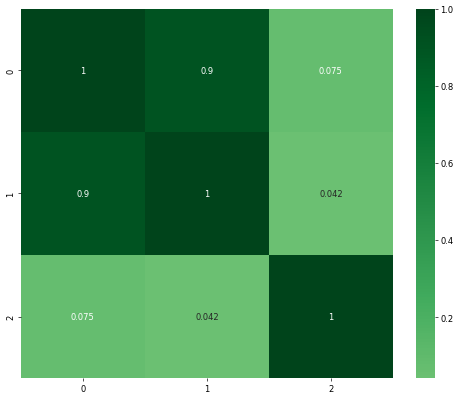

In [21]:
#heatmapa
plt.figure(figsize=(10,8),dpi = 60)
ax = sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,cmap = 'Greens',center = 0,annot = True)
plt.show()
#można brać też wartości bezwzględne - wówczas im ciemniejszy kolor 
#tym bardziej od siebie zależne zmienne
plt.figure(figsize=(10,8),dpi = 60)
ax = sns.heatmap(np.abs(cor),xticklabels=cor.columns,yticklabels=cor.columns,cmap = 'Greens',center = 0,annot = True)
plt.show()


## Zadanie 4 - Centralne twierdzenie graniczne

1. Szacuje się, że w średnia wartość ilorazu inteligencji wynosi 100 z odchyleniem standardowym 15. Jakie jest prawdopodobieństwo, że wśród 30 losowo wybranych osób, ich średni iloraz inteligencji przekroczy 105?

2. Szacuje się, że 60% dorosłych Polaków posiada własny samochód. Jakie jest prawdopodobieństwo, że wśród 1000 osób będzie od 500 do 700 posiadaczy własnego auta?

3. Co dwudziesta młoda osoba w Polsce jest na diecie wegańskiej. Wyznacz prawdopodobieństwo, że wśród 100 młodych Polaków, od 5 do 10 osób będzie na diecie wegańskiej?

4. Szacuje się, że rozkład wieku kobiety w chwili urodzenia pierwszego dziecka jest normalny ze średnią 27 lat i odchyleniu standardowym 4 lata. Jakie jest prawdopodobieństwo, że wśród 100 losowo wybranych kobiet, ich średnia wieku, kiedy urodziły pierwsze dziecko przekroczy 30 lat?

5. Przeprowadzone badania pokazały, że co trzeci dorosły mężczyzna dojeżdża do pracy własnym pojazdem. Jakie jest prawdopodobieństwo, że wśród 300 losowo wybranych mężczyzn co najmniej 80, ale nie więcej niż 120, dojeżdża do pracy własnym pojazdem?

6. Przyjmuje się, że 1\% populacji choruje na schizofrenię. Oblicz prawdopodobieństwo, że wśród losowo wybranych
1000 osób będzie więcej niż 12 cierpiących na to zaburzenie.

1. Mamy rozkład (niekoniecznie normalny) o średniej $\mu = 100$ i odchyleniem standardowym $\sigma = 15$. Chcemy, żeby średnia była większa od $105$, zatem chcemy aby suma: $S_n>105*30 = 3150$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(S_n>3150) = 1-\mathbb{P}(S_n\leqslant 3150)\\
 = 1-\mathbb{P}\left(\frac{S_n-n\mu}{\sqrt{n}\sigma}\leqslant \frac{3150-n\mu}{\sqrt{n}\sigma}\right) \\
 = 1-\mathbb{P}\left(\frac{S_n-30*100}{\sqrt{30}*15}\leqslant \frac{3150-30*100}{\sqrt{30}*15}\right)\\
 = 1-\mathbb{P}\left(\frac{S_n-3000}{\sqrt{30}*15}\leqslant \frac{10}{\sqrt{30}}\right)\\
  \approx 1-𝚽\left(\frac{10}{\sqrt{30}}\right) \approx 0.03
\end{equation*}

In [22]:
snorm = stats.norm(loc = 0,scale = 1)
1-snorm.cdf(10/np.sqrt(30))

0.0339445774309145

2. Mamy rozkład Benoulliego o prawdopodobieństwie $p = 0.6$. Chcemy, żeby suma osób posiadających samochody była od $500$ do $700$, zatem chcemy aby suma: $500\leqslant S_n\leqslant 700$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(500\leqslant S_n\leqslant 700) =
 \mathbb{P}\left(\frac{500-np}{\sqrt{np(1-p)}}\leqslant\frac{S_n-np}{\sqrt{np(1-p)}}\leqslant \frac{700-np}{\sqrt{np(1-p)}}\right) \\
=  \mathbb{P}\left(\frac{500-1000*0.6}{\sqrt{1000*0.6*0.4}}\leqslant\frac{S_n-1000*0.6}{\sqrt{1000*0.6*0.4}}\leqslant \frac{700-1000*0.6}{\sqrt{1000*0.6*0.4}}\right) \\
=  \mathbb{P}\left(\frac{-100}{\sqrt{240}}\leqslant\frac{S_n-600}{\sqrt{240}}\leqslant \frac{100}{\sqrt{240}}\right)
  \approx 𝚽\left(\frac{100}{\sqrt{240}}\right)-𝚽\left(\frac{-100}{\sqrt{240}}\right) \approx 0.99
\end{equation*}

In [23]:
snorm = stats.norm(loc = 0,scale = 1)
snorm.cdf(100/np.sqrt(240))-snorm.cdf(-100/np.sqrt(240))

0.9999999998917612

3. Mamy rozkład Benoulliego o prawdopodobieństwie $p = 0.05$. Chcemy, żeby suma osób na diecie wegańskiej była od $5$ do $10$, zatem chcemy aby suma: $5\leqslant S_n\leqslant 10$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(5\leqslant S_n\leqslant 10) =
 \mathbb{P}\left(\frac{5-np}{\sqrt{np(1-p)}}\leqslant\frac{S_n-np}{\sqrt{np(1-p)}}\leqslant \frac{10-np}{\sqrt{np(1-p)}}\right) \\
=  \mathbb{P}\left(\frac{5-100*0.05}{\sqrt{100*0.05*0.95}}\leqslant\frac{S_n-100*0.05}{\sqrt{100*0.05*0.95}}\leqslant \frac{10-100*0.05}{\sqrt{100*0.05*0.95}}\right) \\
=  \mathbb{P}\left(0\leqslant\frac{S_n-5}{\sqrt{4.75}}\leqslant \frac{5}{\sqrt{4.75}}\right)
  \approx 𝚽\left(\frac{5}{\sqrt{4.75}}\right)-𝚽\left(0\right) \approx 0.49
\end{equation*}

In [24]:
snorm = stats.norm(loc = 0,scale = 1)
snorm.cdf(5/np.sqrt(4.75))-snorm.cdf(0)

0.48910926860444026

4. Mamy rozkład normalny o średniej $\mu = 27$ i odchyleniem standardowym $\sigma = 4$. Chcemy, żeby średnia była większa od $30$, zatem chcemy aby suma: $S_n>100*30 = 3000$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(S_n>3000) = 1-\mathbb{P}(S_n\leqslant 3000)\\
 = 1-\mathbb{P}\left(\frac{S_n-n\mu}{\sqrt{n}\sigma}\leqslant \frac{3000-n\mu}{\sqrt{n}\sigma}\right) \\
 = 1-\mathbb{P}\left(\frac{S_n-2700}{\sqrt{100}*4}\leqslant \frac{3000-2700}{\sqrt{100}*4}\right)\\
 = 1-\mathbb{P}\left(\frac{S_n-2700}{\sqrt{100}*4}\leqslant \frac{300}{40}\right)\\
  \approx 1-𝚽\left(\frac{30}{4}\right) \approx 0
\end{equation*}

In [25]:
snorm = stats.norm(loc = 0,scale = 1)
1-snorm.cdf(30/4)

3.186340080674199e-14

5. Mamy rozkład Benoulliego o prawdopodobieństwie $p = \frac{1}{3}$. Chcemy, żeby suma osób dojeżdżających swoim pojazdem do pracy była od $80$ do $120$, zatem chcemy aby suma: $80\leqslant S_n\leqslant 120$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(80\leqslant S_n\leqslant 120) =
 \mathbb{P}\left(\frac{80-np}{\sqrt{np(1-p)}}\leqslant\frac{S_n-np}{\sqrt{np(1-p)}}\leqslant \frac{120-np}{\sqrt{np(1-p)}}\right) \\
=  \mathbb{P}\left(\frac{80-300*\frac{1}{3}}{\sqrt{300*\frac{1}{3}*\frac{2}{3}}}\leqslant\frac{S_n-300*\frac{1}{3}}{\sqrt{300*\frac{1}{3}*\frac{2}{3}}}\leqslant \frac{120-300*\frac{1}{3}}{\sqrt{300*\frac{1}{3}*\frac{2}{3}}}\right) \\
=  \mathbb{P}\left(\frac{-20}{\sqrt{\frac{200}{3}}}\leqslant\frac{S_n-100}{\sqrt{\frac{200}{3}}}\leqslant \frac{20}{\sqrt{\frac{200}{3}}}\right)
  \approx 𝚽\left(\frac{2}{\sqrt{\frac{2}{3}}}\right)-𝚽\left(\frac{-2}{\sqrt{\frac{2}{3}}}\right) \approx 0.98
\end{equation*}

In [26]:
snorm = stats.norm(loc = 0,scale = 1)
snorm.cdf(2/np.sqrt(2/3))-snorm.cdf(-2/np.sqrt(2/3))

0.9856941215645703

6. Mamy rozkład Benoulliego o prawdopodobieństwie $p = 0.01$. Chcemy, obliczyć prawdopodobieństwo zdarzenia, że suma osób chorujących na schizofrenię jest większa od $12$, zatem chcemy aby suma: $12< S_n$. Zatem korzystając z CTG:
\begin{equation*}
\mathbb{P}(12< S_n) = 1-\mathbb{P}(S_n\leqslant 12)\\
 =1-\mathbb{P}\left(\frac{S_n-np}{\sqrt{np(1-p)}}\leqslant \frac{12-np}{\sqrt{np(1-p)}}\right) \\
=  1-\mathbb{P}\left(\frac{S_n-1000*0.01}{\sqrt{1000*0.01*0.99}}\leqslant \frac{12-1000*0.01}{\sqrt{1000*0.01*0.99}}\right) \\
=  1-\mathbb{P}\left(\frac{S_n-1}{\sqrt{0.999}}\leqslant \frac{2}{\sqrt{9.9}}\right)\\
  \approx 1- 𝚽\left(\frac{2}{\sqrt{9.9}}\right) \approx 0.26
\end{equation*}

In [27]:
snorm = stats.norm(loc = 0,scale = 1)
1-snorm.cdf(2/np.sqrt(9.9))

0.2625049832093017